**This notebook is an exercise in the [SQL](https://www.kaggle.com/learn/intro-to-sql) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/as-with).**

---


# Introduction

You are getting to the point where you can own an analysis from beginning to end. So you'll do more data exploration in this exercise than you've done before.  Before you get started, run the following set-up code as usual. 

[Open in Kaggle](https://www.kaggle.com/leonichel/exercise-as-with)

In [1]:
# Set up feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.sql.ex5 import *
print("Setup Complete")

Using Kaggle's public dataset BigQuery integration.


/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


Setup Complete


You'll work with a dataset about taxi trips in the city of Chicago. Run the cell below to fetch the `chicago_taxi_trips` dataset.

In [2]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "chicago_taxi_trips" dataset
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


# Exercises

You are curious how much slower traffic moves when traffic volume is high. This involves a few steps.

### 1) Find the data
Before you can access the data, you need to find the table name with the data.

*Hint*: Tab completion is helpful whenever you can't remember a command. Type `client.` and then hit the tab key. Don't forget the period before hitting tab.

In [7]:
# Your code here to find the table name

tables = list(client.list_tables(dataset))

for table in tables:  
    print(table.table_id)

taxi_trips


In [9]:
# Write the table name as a string below
table_name = 'taxi_trips'

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

For the solution, uncomment the line below.

In [10]:
#q_1.solution()

### 2) Peek at the data

Use the next code cell to peek at the top few rows of the data. Inspect the data and see if any issues with data quality are immediately obvious. 

In [12]:
# Your code here

table_ref = dataset_ref.table("taxi_trips")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  """


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,f0d00207c546d46b70e45593e08c3bdde2a621f1,6db76715006643fd2c01bce95f1ccb0e4898c982bdd49e...,2015-03-23 07:45:00+00:00,2015-03-23 08:00:00+00:00,1020,4.8,NaN,NaN,NaN,NaN,...,0.0,13.45,Cash,None,NaN,NaN,None,NaN,NaN,None
1,4db8d8ae8fd2b85bb2fc033953ecfc3bffa8e598,6345c275c3196199439cb92ea044ea2b53d09bdf0678da...,2014-08-04 10:00:00+00:00,2014-08-04 10:00:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,9.25,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
2,fa49c910b6b086f773adcc31f9a2984fe669671f,8e00dda715e5ab59f03f049f4faa99fcf216fd6815d927...,2014-02-02 15:15:00+00:00,2014-02-02 15:15:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,30.78,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
3,931af0a4370dd65a98fd31cf74cf936d16adc9d3,6182ac4e117d50e00e012ec0b691c6e8fe6d22cf72a301...,2014-08-04 11:45:00+00:00,2014-08-04 11:45:00+00:00,0,0.0,NaN,NaN,NaN,NaN,...,0.0,35.10,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
4,f05c305b5dd9c0c3dc62cbcb10043623f3244a9f,be396e27bd8c66375b7a19addba6630c208b57938c5dc4...,2014-01-08 20:45:00+00:00,2014-01-08 20:45:00+00:00,360,1.3,NaN,NaN,NaN,NaN,...,0.0,6.25,Cash,Top Cab Affiliation,NaN,NaN,None,NaN,NaN,None


After deciding whether you see any important issues, run the code cell below.

In [11]:
# Check your answer (Run this code cell to receive credit!)
q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
You can see the data by calling: 
```python
# Construct a reference to the "taxi_trips" table
table_ref = dataset_ref.table("taxi_trips")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "taxi_trips" table
client.list_rows(table, max_results=5).to_dataframe()
```

Some trips in the top few rows have `trip_seconds` or `trip_miles` values of 0. 
Other location fields have values of `None`. That is a problem if we want to use those fields.


### 3) Determine when this data is from

If the data is sufficiently old, we might be careful before assuming the data is still relevant to traffic patterns today. Write a query that counts the number of trips in each year.  

Your results should have two columns:
- `year` - the year of the trips
- `num_trips` - the number of trips in that year

Hints:
- When using **GROUP BY** and **ORDER BY**, you should refer to the columns by the alias `year` that you set at the top of the **SELECT** query.
- The SQL code to **SELECT** the year from `trip_start_timestamp` is <code>SELECT EXTRACT(YEAR FROM trip_start_timestamp)</code>
- The **FROM** field can be a little tricky until you are used to it.  The format is:
    1. A backick (the symbol \`).
    2. The project name. In this case it is `bigquery-public-data`.
    3. A period.
    4. The dataset name. In this case, it is `chicago_taxi_trips`.
    5. A period.
    6. The table name. You used this as your answer in **1) Find the data**.
    7. A backtick (the symbol \`).

In [24]:
# Your code goes here
rides_per_year_query = """
                       SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, COUNT(1) AS num_trips
                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                       GROUP BY year
                       ORDER BY year
                       """

# Set up the query (cancel the query if it would use too much of 
# your quota)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
rides_per_year_query_job = client.query(rides_per_year_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
rides_per_year_result = rides_per_year_query_job.to_dataframe() # Your code goes here

# View results
print(rides_per_year_result)

# Check your answer
q_3.check()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


   year  num_trips
0  2013   27217716
1  2014   37395436
2  2015   32385875
3  2016   31759339
4  2017   24988003
5  2018   20732088
6  2019   16477365
7  2020    3889032
8  2021     741757


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<AxesSubplot:>

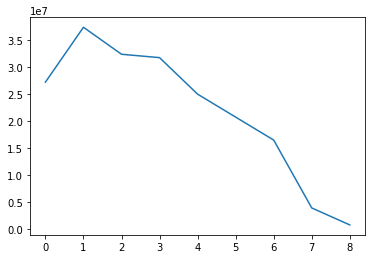

In [29]:
rides_per_year_result.num_trips.plot()

For a hint or the solution, uncomment the appropriate line below.

In [23]:
#q_3.hint()
#q_3.solution()

### 4) Dive slightly deeper

You'd like to take a closer look at rides from 2017.  Copy the query you used above in `rides_per_year_query` into the cell below for `rides_per_month_query`.  Then modify it in two ways:
1. Use a **WHERE** clause to limit the query to data from 2017.
2. Modify the query to extract the month rather than the year.

In [31]:
# Your code goes here
rides_per_month_query = """
                        SELECT EXTRACT(MONTH FROM trip_start_timestamp) AS month, COUNT(1) AS num_trips
                        FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                        WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2017
                        GROUP BY month
                        ORDER BY month
                        """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
rides_per_month_query_job = client.query(rides_per_month_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
rides_per_month_result = rides_per_month_query_job.to_dataframe()

# View results
print(rides_per_month_result)

# Check your answer
q_4.check()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


    month  num_trips
0       1    1972071
1       2    1909802
2       3    2362105
3       4    2194702
4       5    2323386
5       6    2324472
6       7    2054299
7       8    2079861
8       9    1950631
9      10    2141197
10     11    1907997
11     12    1767480


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<AxesSubplot:>

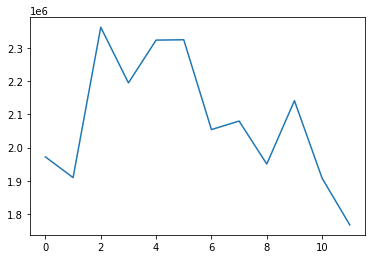

In [32]:
rides_per_month_result.num_trips.plot()

For a hint or the solution, uncomment the appropriate line below.

In [26]:
#q_4.hint()
#q_4.solution()

### 5) Write the query

It's time to step up the sophistication of your queries.  Write a query that shows, for each hour of the day in the dataset, the corresponding number of trips and average speed.

Your results should have three columns:
- `hour_of_day` - sort by this column, which holds the result of extracting the hour from `trip_start_timestamp`.
- `num_trips` - the count of the total number of trips in each hour of the day (e.g. how many trips were started between 6AM and 7AM, independent of which day it occurred on).
- `avg_mph` - the average speed, measured in miles per hour, for trips that started in that hour of the day.  Average speed in miles per hour is calculated as `3600 * SUM(trip_miles) / SUM(trip_seconds)`. (The value 3600 is used to convert from seconds to hours.)

Restrict your query to data meeting the following criteria:
- a `trip_start_timestamp` between **2017-01-01** and **2017-07-01**
- `trip_seconds` > 0 and `trip_miles` > 0

You will use a common table expression (CTE) to select just the relevant rides.  Because this dataset is very big, this CTE should select only the columns you'll need to create the final output (though you won't actually create those in the CTE -- instead you'll create those in the later **SELECT** statement below the CTE).

This is a much harder query than anything you've written so far.  Good luck!

In [35]:
# Your code goes here
speeds_query = """
               WITH RelevantRides AS
               (
                   SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, trip_miles, trip_seconds
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   WHERE trip_start_timestamp > '2017-01-01' AND trip_start_timestamp < '2017-07-01' AND trip_seconds > 0 AND trip_miles > 0
               )
               SELECT hour_of_day, COUNT(1) AS num_trips, 3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph
               FROM RelevantRides
               GROUP BY hour_of_day
               ORDER BY hour_of_day
               """

# Set up the query (cancel the query if it would use too much of 
# your quota)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
speeds_query_job = client.query(speeds_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
speeds_result = speeds_query_job.to_dataframe()

# View results
print(speeds_result)

# Check your answer
q_5.check()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


    hour_of_day  num_trips    avg_mph
0             0     319339  20.230524
1             1     266529  18.937621
2             2     210147  18.777070
3             3     159668  20.158048
4             4     122183  26.736014
5             5     119312  30.769172
6             6     182738  24.588313
7             7     358406  17.735967
8             8     541775  15.079892
9             9     565548  16.543882
10           10     525120  18.539614
11           11     594603  18.928379
12           12     622324  17.838745
13           13     630181  17.671089
14           14     622465  16.974239
15           15     640430  15.688418
16           16     701435  14.283888
17           17     756627  12.462955
18           18     768251  13.646810
19           19     701064  16.642882
20           20     598614  19.536777
21           21     552726  20.433874
22           22     501095  19.531374
23           23     399587  19.877046


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

<AxesSubplot:>

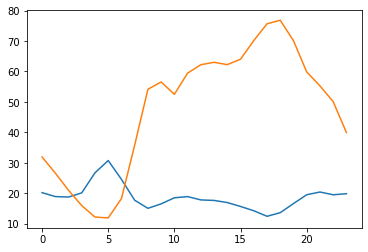

In [49]:
speeds_result.avg_mph.plot()
(speeds_result.num_trips/10000).plot()

For the solution, uncomment the appropriate line below.

In [34]:
#q_5.solution()

That's a hard query. If you made good progress towards the solution, congratulations!

# Keep going

You can write very complex queries now with a single data source. But nothing expands the horizons of SQL as much as the ability to combine or **JOIN** tables.

**[Click here](https://www.kaggle.com/dansbecker/joining-data)** to start the last lesson in the Intro to SQL micro-course.

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161314) to chat with other Learners.*